In [14]:
import math
import pandas as pd
import random
import sys
from matplotlib import pyplot as plt
import numpy as np

In [15]:
data = pd.read_csv('Heart Disease.csv')
print("Data head")
print(data.head())
print("Data describe")
print(data.describe())
print("Data info")
print(data.info())
data_cleaned = data.dropna()
print("Cleaned data (removed data rows with missing value(s))")
print(data_cleaned.describe())

Data head
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   HeartDisease  
0             0  
1   

In [16]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('HeartDisease', axis=1)
y = data_cleaned['HeartDisease']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (2560, 15), Validation set: (547, 15), Test set: (549, 15)


In [17]:
def cross_entropy_loss(y_true, y_pred):
    losses = []
    assert(len(y_true) == len(y_pred) and len(y_true) != 0)
    for i in range(len(y_true)):
        y_pred[i] = min(max(y_pred[i], 1e-15), 1 - 1e-15) #IMPORTANT
        losses.append(y_true.iloc[i]*math.log(y_pred[i]) + (1 - y_true.iloc[i])*math.log(1 - y_pred[i]))
    loss = sum(losses)/len(y_true)*(-1)
    return loss

def sigmoid(z):
    return 1/(1+math.exp(-z))

def predict(X, weights):
    predictions = []
    
    for i in range(X.shape[0]):
        z = weights[-1]
        for j in range(X.shape[1]):
            z += X.iloc[i, j]*weights[j]
        z =  min(max(z, -500), 500)
        prediction = sigmoid(z)
        predictions.append(prediction)
    
    return predictions

def gradient_descent(X, y_true, y_pred, weights, learning_rate):
    for j in range(len(weights) - 1):
        error = 0
        for i in range(X.shape[0]):
            error += (y_pred[i] - y_true.iloc[i])*X.iloc[i, j]
        weights[j] -= learning_rate * (1/X.shape[0]) * error
    error = 0
    for i in range(X.shape[0]):
        error += (y_pred[i] - y_true.iloc[i])
    weights[-1] -= learning_rate * (1/X.shape[0]) * error
    return weights

class LogisticRegression:
    
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        
    def prediction(self, X):
        y_pred = predict(X, self.weights)
        return [1 if p > 0.5 else 0 for p in y_pred]
    
    def fit(self, X, y_true, X_v, y_v):
        train_loss_list = []
        val_loss_list = []
        train_accuracy_list = []
        val_accuracy_list = []
        self.weights = [np.random.uniform(-1/np.sqrt(X.shape[1]), 1/np.sqrt(X.shape[1])) for _ in range(X.shape[1] + 1)]
        
        for _ in range(self.epochs):
            train_predictions = predict(X, weights=self.weights)
            train_loss = cross_entropy_loss(y_true, train_predictions)
            train_loss_list.append(train_loss)
            train_predictions_hard = self.prediction(X)
            train_accuracy = (sum([1 for i in range(len(train_predictions_hard)) if y_true.iloc[i] == train_predictions_hard[i]])/len(train_predictions_hard))*100
            train_accuracy_list.append(train_accuracy)
            val_predictions = predict(X_v, weights=self.weights)
            print(max(val_predictions))
            val_loss = cross_entropy_loss(y_v, val_predictions)
            val_loss_list.append(val_loss)
            val_predictions_hard = self.prediction(X_v)
            val_accuracy = (sum([1 for i in range(len(val_predictions_hard)) if y_v.iloc[i] == val_predictions_hard[i]])/len(val_predictions_hard))*100
            val_accuracy_list.append(val_accuracy)
            
            self.weights = gradient_descent(X, y_true, train_predictions, self.weights, self.learning_rate)
            
            if _ % 10 == 0:
                    print(f"Iteration {_}, Training Loss: {train_loss}")
                    print(f"Iteration {_}, Validation Loss: {val_loss}")
        
        return train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, self.weights

Iteration 0, Training Loss: 0.9873223150032869
Iteration 0, Validation Loss: 0.980614183453905
Iteration 10, Training Loss: 0.4391323316172464
Iteration 10, Validation Loss: 0.4458073952065899
Iteration 20, Training Loss: 0.43805943043045614
Iteration 20, Validation Loss: 0.4444996834954929
Iteration 30, Training Loss: 0.43705243000021915
Iteration 30, Validation Loss: 0.443290332621617
Iteration 40, Training Loss: 0.4361040868504379
Iteration 40, Validation Loss: 0.44216834907725927
Iteration 50, Training Loss: 0.4352082880352969
Iteration 50, Validation Loss: 0.4411242792992432


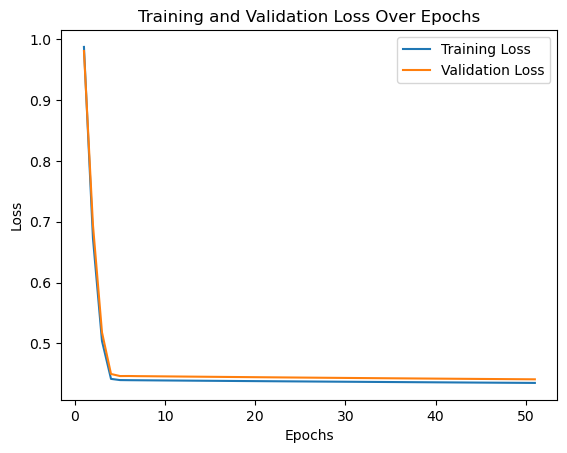

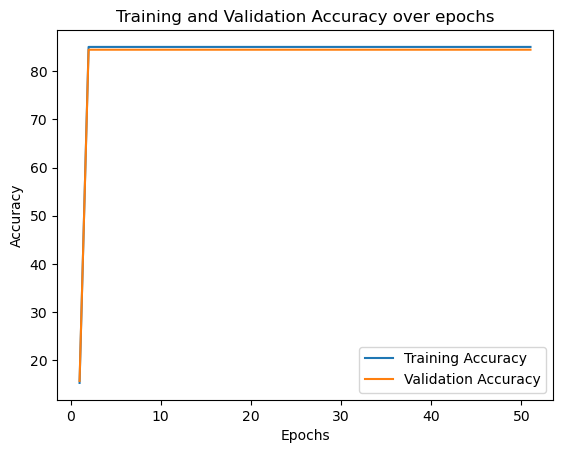

In [39]:
classifier = LogisticRegression(learning_rate=0.0001, epochs=51)
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, _ = classifier.fit(X_train, y_train, X_val, y_val)

epochs = range(1, len(train_loss_list) + 1)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over epochs')
plt.legend()
plt.show()

 Comment on the convergence of the model

The model converges instantly in less than 10 epochs. Loss converges to around 0.44 whereas accuracy converges to about 84%

Compare and analyze the plots

Both training and validation loss converge to similar values. At iteration 50, Training Loss: 0.4352082880352969
and Validation Loss: 0.4411242792992432. So we can say that the model has both, low bias and low variance.
Similarly, the model records similar accuracy on both training and validation accuracies with training accuracy being slightly higher than the validation accuracy.


In [18]:
def minmaxscale(X):
    X_scaled = X.copy()
    for column in X.columns:
        column_min = X[column].min()
        column_max = X[column].max()
        X_scaled[column] = (X[column] - column_min) / (column_max - column_min)
        
    return X_scaled

X_train_scaled = minmaxscale(X_train)
X_val_scaled = minmaxscale(X_val)
X_test_scaled = minmaxscale(X_test)

Iteration 0, Training Loss: 0.6980190569786775
Iteration 0, Validation Loss: 0.6976810094355003
Iteration 10, Training Loss: 0.6720760848806321
Iteration 10, Validation Loss: 0.6720072331403044
Iteration 20, Training Loss: 0.6491103363833821
Iteration 20, Validation Loss: 0.6493309102744037
Iteration 30, Training Loss: 0.6287658206159208
Iteration 30, Validation Loss: 0.6292902768292545
Iteration 40, Training Loss: 0.6107247004362073
Iteration 40, Validation Loss: 0.6115625697461318
Iteration 50, Training Loss: 0.5947054342258538
Iteration 50, Validation Loss: 0.5958621270952233


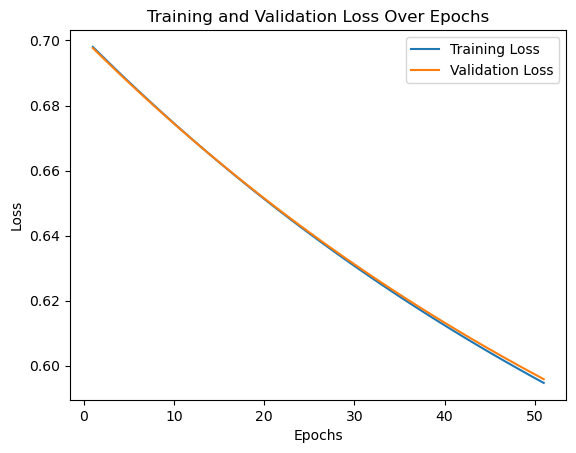

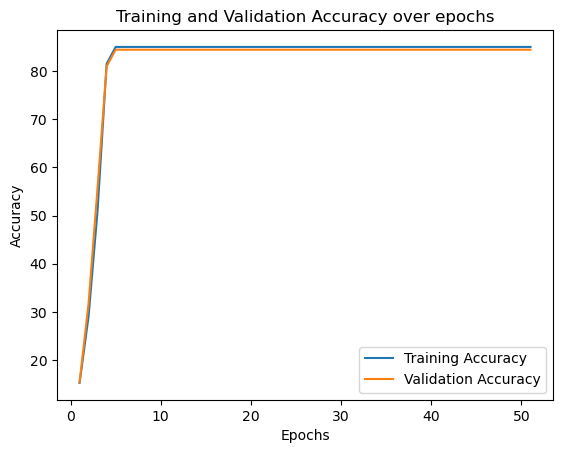

In [33]:
classifier = LogisticRegression(learning_rate=0.01, epochs=51)
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, _ = classifier.fit(X_train_scaled, y_train, X_val_scaled, y_val)

epochs = range(1, len(train_loss_list) + 1)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over epochs')
plt.legend()
plt.show()

Compare and discuss the impact of feature scaling on model convergence

As compared to the previous plot where the model was applied to unscaled data, this time the loss converges much more gradually and consistently decreases till the last epoch. Again, the training loss is slightly lesser than the validation loss but both are similar in value. Training and validation accuracies follow a similar trend with training accuracy being slightly higher than the validation accuracy.
In conclusion, feature scaling results in a more stable convergence.

In [8]:
import numpy as np
from sklearn.metrics import roc_auc_score

def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FN = sum((y_true == 1) & (y_pred == 0))
    
    return TP, FP, TN, FN

def metrics(TP, FP, TN, FN):
    precision = TP / max((TP + FP), 1e-7)  
    recall = TP / max((TP + FN), 1e-7) 
    f1 = 2 * precision * recall / max((precision + recall), 1e-7) 
    
    return precision, recall, f1

def roc_auc(y_true, y_pred_probs):
    y_true = y_true.values  
    return roc_auc_score(y_true, y_pred_probs)

classifier = LogisticRegression(learning_rate=2, epochs=101)

train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, weights = classifier.fit(X_train_scaled, y_train, X_val_scaled, y_val)

y_val_probs = predict(X_val, weights)  
y_val_pred = classifier.prediction(X_val)  

print("y_val", y_val, "y_val_pred", y_val_pred)

TP, FP, TN, FN = confusion_matrix(y_val, y_val_pred)

precision, recall, f1 = metrics(TP, FP, TN, FN)

roc_auc_val = roc_auc(y_val, y_val_probs)

# Print the results
print(f"Confusion Matrix: TP={TP}, TN={TN}, FP={FP}, FN={FN}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc_val:.4f}")

0.4452492193059301
Iteration 0, Training Loss: 0.5584657215649693
Iteration 0, Validation Loss: 0.5579114662807422
0.30191585032837126
0.2851658211792654
0.2746117590461892
0.2661919421301196
0.2587010900540947
0.2519231662565234
0.2536534355530339
0.2551995714661451
0.2565576167665622
0.26097590210004284
Iteration 10, Training Loss: 0.4201922557898409
Iteration 10, Validation Loss: 0.4330949169842755
0.2692120959916538
0.2770677594596662
0.2845529287529081
0.2916795251175904
0.2984606759803327
0.3049102455268053
0.31104248667650536
0.3168717759118259
0.3224124105840274
0.32767845552435343
Iteration 20, Training Loss: 0.4052524395728641
Iteration 20, Validation Loss: 0.421451042199093
0.33268362915978505
0.3374412213171576
0.3429668801249389
0.3495227064030446
0.35586065063841565
0.3619890291542137
0.3679160095768477
0.37364956952197786
0.37919746595406684
0.3845672132657756
Iteration 30, Training Loss: 0.3974390675965499
Iteration 30, Validation Loss: 0.41594215811788304
0.38976606843

Precision = 0.1832 --- Precision measures the proportion of correctly predicted positive observations to the total predicted positives. Low precision score indicates that the model reports a high number of false positives (FP) which is true. As we can see our model reports 312 False Positives.

Recall (or Sensitivity) = 0.8235 --- Recall measures the proportion of correctly predicted positive observations to all actual positives. A high recall value indicates that most of the actual postives are identifies by our model as positives. This means a lesser number of False Negatives (15).

F1 Score = 0.2998 --- The F1 Score is the harmonic mean of Precision and Recall, balancing both metrics. It is especially useful when we need a single score that balances both precision and recall. A low F1 score means that the model either has poor precision, recall, or both.

ROC-AUC score = 0.6556 --- The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score measures the model's ability to distinguish between classes by plotting the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity). An ROC-AUC score of 0.5 indicates that the model is performing no better than random guessing, while a score closer to 1.0 indicates strong discriminatory power.

In [9]:
print(train_accuracy_list[-1])
print(val_accuracy_list[-1])
print(sum(y_val_pred)/len(y_val_pred))
print(sum(y_val)/len(y_val))
print(max(y_val_probs))

85.5078125
84.46069469835467
0.6983546617915904
0.15539305301645337
1.0


D)

In [12]:
def stochastic_gradient_descent(X, y_true, weights, learning_rate):
    for i in range(X.shape[0]):  # Loop over each sample
        y_pred = predict(X.iloc[i:i+1], weights)[0]
        
        for j in range(len(weights) - 1):
            error = (y_pred - y_true.iloc[i]) * X.iloc[i, j]
            weights[j] -= learning_rate * error

        error = (y_pred - y_true.iloc[i])
        weights[-1] -= learning_rate * error
    
    return weights

def mini_batch_gradient_descent(X, y_true, weights, learning_rate, batch_size):
    num_batches = X.shape[0] // batch_size
    
    for b in range(num_batches):
        X_batch = X.iloc[b*batch_size:(b+1)*batch_size]
        y_batch = y_true.iloc[b*batch_size:(b+1)*batch_size]
        
        # Predict for the batch
        y_pred = predict(X_batch, weights)
        
        for j in range(len(weights) - 1):
            error = 0
            for i in range(X_batch.shape[0]):
                error += (y_pred[i] - y_batch.iloc[i]) * X_batch.iloc[i, j]
            weights[j] -= learning_rate * (1/len(X_batch)) * error
        
        error = 0
        for i in range(X_batch.shape[0]):
            error += (y_pred[i] - y_batch.iloc[i])
        weights[-1] -= learning_rate * (1/len(X_batch)) * error
    
    return weights


class LogisticRegressionOptimization:
    
    def __init__(self, learning_rate, epochs, optimization="batch", batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.optimization = optimization  # "batch", "sgd", "mbgd"
        self.batch_size = batch_size  # Only used if optimization is "mbgd"
        
    def prediction(self, X):
        y_pred = predict(X, self.weights)
        return [1 if p > 0.5 else 0 for p in y_pred]
    
    def fit(self, X, y_true, X_v, y_v):
        train_loss_list = []
        val_loss_list = []
        train_accuracy_list = []
        val_accuracy_list = []
        self.weights = [np.random.uniform(-1/np.sqrt(X.shape[1]), 1/np.sqrt(X.shape[1])) for _ in range(X.shape[1] + 1)]
        
        for epoch in range(self.epochs):
            train_predictions = predict(X, weights=self.weights)
            train_loss = cross_entropy_loss(y_true, train_predictions)
            train_loss_list.append(train_loss)
            train_predictions_hard = self.prediction(X)
            train_accuracy = (sum([1 for i in range(len(train_predictions_hard)) if y_true.iloc[i] == train_predictions_hard[i]])/len(train_predictions_hard))*100
            train_accuracy_list.append(train_accuracy)
            val_predictions = predict(X_v, weights=self.weights)
            val_loss = cross_entropy_loss(y_v, val_predictions)
            val_loss_list.append(val_loss)
            val_predictions_hard = self.prediction(X_v)
            val_accuracy = (sum([1 for i in range(len(val_predictions_hard)) if y_v.iloc[i] == val_predictions_hard[i]])/len(val_predictions_hard))*100
            val_accuracy_list.append(val_accuracy)
            
            if self.optimization == "sgd":
                self.weights = stochastic_gradient_descent(X, y_true, self.weights, self.learning_rate)
            elif self.optimization == "mbgd":
                self.weights = mini_batch_gradient_descent(X, y_true, self.weights, self.learning_rate, self.batch_size)
            else:  # Default to batch gradient descent
                self.weights = gradient_descent(X, y_true, train_predictions, self.weights, self.learning_rate)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}")
                print(f"Epoch {epoch}, Validation Loss: {val_loss}")
        
        return train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, self.weights

Epoch 0, Training Loss: 0.6009832760408351
Epoch 0, Validation Loss: 0.5963464623774873
Epoch 10, Training Loss: 0.3765677306474632
Epoch 10, Validation Loss: 0.40135245029632977
Epoch 20, Training Loss: 0.37122149846291314
Epoch 20, Validation Loss: 0.3977381270386172
Epoch 30, Training Loss: 0.36942728774649475
Epoch 30, Validation Loss: 0.3970104591606804
Epoch 40, Training Loss: 0.3685496612573965
Epoch 40, Validation Loss: 0.3972967138975148
Epoch 50, Training Loss: 0.36805445890742244
Epoch 50, Validation Loss: 0.39807417327852823


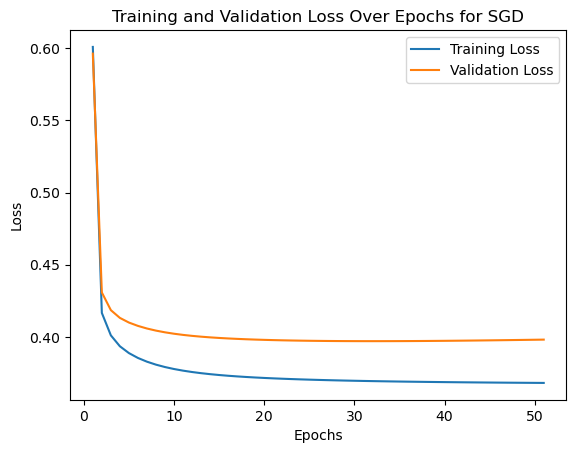

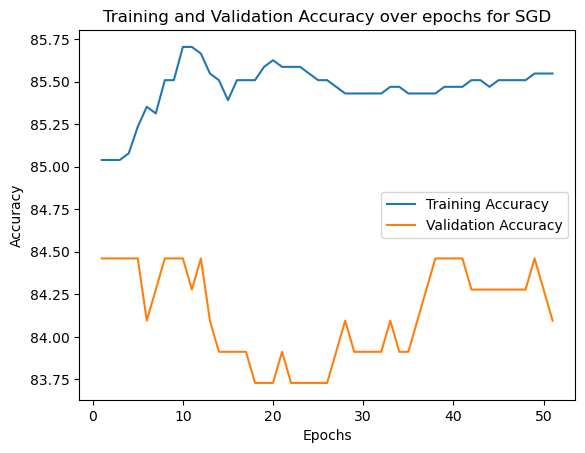

In [20]:
classifier = LogisticRegressionOptimization(learning_rate=0.01, epochs=51, optimization="sgd")
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, weights = classifier.fit(X_train_scaled, y_train, X_val_scaled, y_val)

epochs = range(1, len(train_loss_list) + 1)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for SGD')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over epochs for SGD')
plt.legend()
plt.show()

Epoch 0, Training Loss: 0.60620183881689
Epoch 0, Validation Loss: 0.6238898048167306
Epoch 10, Training Loss: 0.44332991681053874
Epoch 10, Validation Loss: 0.4579259411008981
Epoch 20, Training Loss: 0.42964746904763434
Epoch 20, Validation Loss: 0.44532994332150144
Epoch 30, Training Loss: 0.4201160281035202
Epoch 30, Validation Loss: 0.4368472395447268
Epoch 40, Training Loss: 0.4131782914983512
Epoch 40, Validation Loss: 0.4308837876827988
Epoch 50, Training Loss: 0.40798013345726175
Epoch 50, Validation Loss: 0.42657082563672083


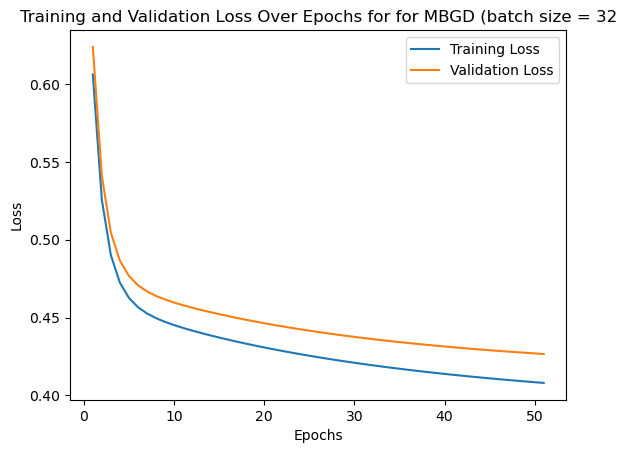

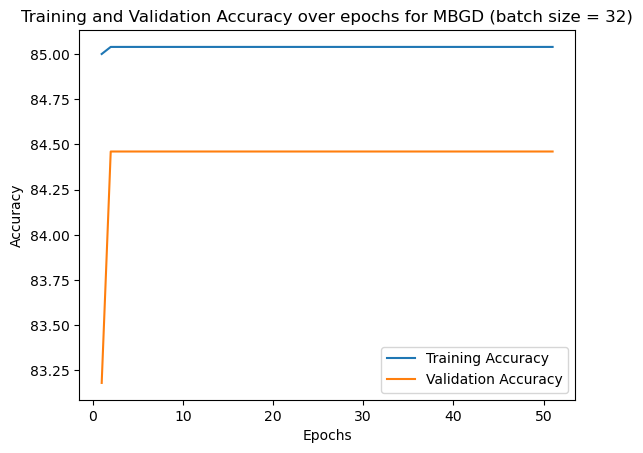

In [21]:
classifier = LogisticRegressionOptimization(learning_rate=0.01, epochs=51, optimization="mbgd", batch_size=32)
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, weights = classifier.fit(X_train_scaled, y_train, X_val_scaled, y_val)

epochs = range(1, len(train_loss_list) + 1)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for for MBGD (batch size = 32')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over epochs for MBGD (batch size = 32)')
plt.legend()
plt.show()

Epoch 0, Training Loss: 0.6681193024714094
Epoch 0, Validation Loss: 0.6653537309828361
Epoch 10, Training Loss: 0.4516411258217928
Epoch 10, Validation Loss: 0.4609627693611028
Epoch 20, Training Loss: 0.43756488473714095
Epoch 20, Validation Loss: 0.4497493661142516
Epoch 30, Training Loss: 0.4304395680024792
Epoch 30, Validation Loss: 0.44381168538422994
Epoch 40, Training Loss: 0.4247423333698346
Epoch 40, Validation Loss: 0.438906044395734
Epoch 50, Training Loss: 0.41997199033159677
Epoch 50, Validation Loss: 0.43481072880320365


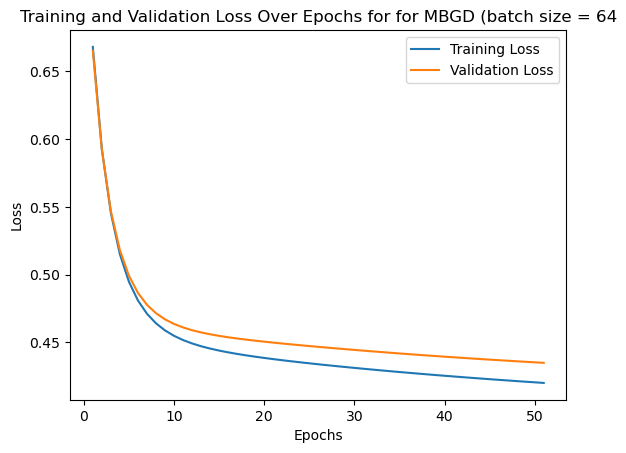

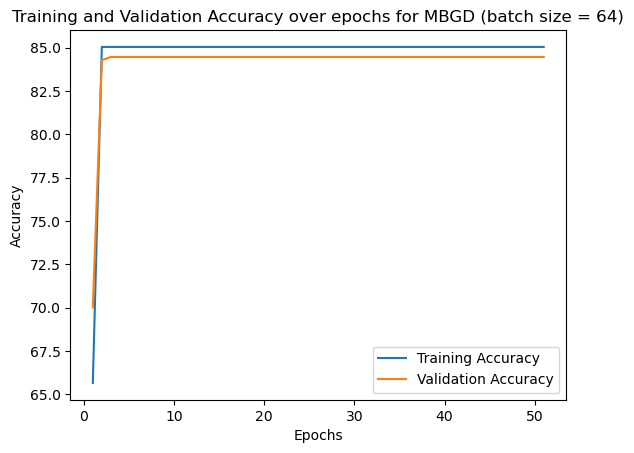

In [19]:
classifier = LogisticRegressionOptimization(learning_rate=0.01, epochs=51, optimization="mbgd", batch_size=64)
train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, weights = classifier.fit(X_train_scaled, y_train, X_val_scaled, y_val)

epochs = range(1, len(train_loss_list) + 1)
plt.plot(epochs, train_loss_list, label='Training Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for for MBGD (batch size = 64')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over epochs for MBGD (batch size = 64)')
plt.legend()
plt.show()

Trade Off in terms of convergence speed and stability between these methods

Both Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent (MBGD) are optimization algorithms that minimize the loss function by updating the model's parameters iteratively based on the gradient of the loss function. The key difference lies in how much data they use in each iteration to compute the gradient.
In SGD, the gradient of the loss function is computed using only one sample at a time.
In MBGD, the gradient is computed based on a small subset (mini-batch) of the training data rather than a single point or the entire dataset.

Convergence speed - From the graphs we can see that SGD results in a faster initial convergence as compared to MBGD. This might be because of frequent updates in SGD and slower updates in MBGD as the gradient is averaged over a mini-batch.

Stability - From the graphs we can see that SGD shows a higher variance in updates specially after converging. It seems to oscillate around the optimum due to noisy gradients. Whereas, MBGD shows a smoother and more stable convergence.

E)

In [22]:
import random

def k_fold_cross_validation(X, y, model_class, k=5, learning_rate=0.01, epochs=100, optimization="batch", batch_size=32):
    indices = list(range(len(X)))
    random.shuffle(indices)
    
    fold_size = len(X) // k
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    for fold in range(k):
        print(f"Processing Fold {fold+1}/{k}")
        
        validation_indices = indices[fold*fold_size : (fold+1)*fold_size]
        train_indices = indices[:fold*fold_size] + indices[(fold+1)*fold_size:]
        
        X_train = X.iloc[train_indices].reset_index(drop=True)
        y_train = y.iloc[train_indices].reset_index(drop=True)
        X_val = X.iloc[validation_indices].reset_index(drop=True)
        y_val = y.iloc[validation_indices].reset_index(drop=True)
        
        model = model_class(learning_rate=learning_rate, epochs=epochs, optimization=optimization, batch_size=batch_size)
        
        train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, weights = model.fit(X_train, y_train, X_val, y_val)
        
        y_val_pred = model.prediction(X_val)
        
        TP, FP, TN, FN = confusion_matrix(y_val, y_val_pred)
        
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision, recall, f1 = metrics(TP, FP, TN, FN)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        print(f"Fold {fold+1} -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    
    avg_accuracy = sum(accuracy_list) / k
    avg_precision = sum(precision_list) / k
    avg_recall = sum(recall_list) / k
    avg_f1 = sum(f1_list) / k
    
    std_accuracy = (sum([(x - avg_accuracy) ** 2 for x in accuracy_list]) / k) ** 0.5
    std_precision = (sum([(x - avg_precision) ** 2 for x in precision_list]) / k) ** 0.5
    std_recall = (sum([(x - avg_recall) ** 2 for x in recall_list]) / k) ** 0.5
    std_f1 = (sum([(x - avg_f1) ** 2 for x in f1_list]) / k) ** 0.5
    
    print("\nCross-Validation Results:")
    print(f"Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {avg_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {avg_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {avg_f1:.4f} ± {std_f1:.4f}")
    
    return avg_accuracy, avg_precision, avg_recall, avg_f1, std_accuracy, std_precision, std_recall, std_f1


In [25]:
avg_accuracy, avg_precision, avg_recall, avg_f1, std_accuracy, std_precision, std_recall, std_f1 = k_fold_cross_validation(
    X_train_scaled, y_train, LogisticRegressionOptimization, k=5, learning_rate=0.01, epochs=41, optimization="batch"
)

Processing Fold 1/5
Epoch 0, Training Loss: 0.6398803862879756
Epoch 0, Validation Loss: 0.6441640921209874
Epoch 10, Training Loss: 0.6191958195319532
Epoch 10, Validation Loss: 0.6256516452227969
Epoch 20, Training Loss: 0.6008435424224309
Epoch 20, Validation Loss: 0.6093355723029604
Epoch 30, Training Loss: 0.5845395349650779
Epoch 30, Validation Loss: 0.5949424071052767
Epoch 40, Training Loss: 0.5700336331439828
Epoch 40, Validation Loss: 0.5822316937109542
Fold 1 -> Accuracy: 0.8223, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Processing Fold 2/5
Epoch 0, Training Loss: 0.6496484498119499
Epoch 0, Validation Loss: 0.6476684771650739
Epoch 10, Training Loss: 0.63180883286102
Epoch 10, Validation Loss: 0.6286113803592095
Epoch 20, Training Loss: 0.6159319148227937
Epoch 20, Validation Loss: 0.6115790871238588
Epoch 30, Training Loss: 0.601779263291637
Epoch 30, Validation Loss: 0.5963300703456937
Epoch 40, Training Loss: 0.58914190454233
Epoch 40, Validation Loss: 0.582652

Accuracy:
Average Accuracy: 0.7934 ± 0.1057
Accuracy is relatively high in most folds, indicating that the model correctly classifies a large proportion of both spam and legitimate emails. However, the high standard deviation (0.1057) suggests that the model’s performance is not consistent across all folds. This variability indicates that the model’s accuracy may depend heavily on the particular split of the dataset, meaning it may generalize poorly on unseen data.

Precision:
Average Precision: 0.1020 ± 0.1344
Precision is quite low on average, with a high standard deviation (0.1344). This suggests that when the model predicts an email as spam, it often makes incorrect predictions, i.e., it frequently flags legitimate emails as spam (false positives). A higher variance in precision indicates the model struggles to consistently differentiate between spam and legitimate emails across different data splits.

Recall:
Average Recall: 0.1143 ± 0.2215
Recall is low overall, meaning the model is not effectively identifying spam emails (many spam emails are missed and classified as legitimate). The high variance (0.2215) suggests that the model’s ability to detect spam varies significantly across folds, further indicating that the model's ability to identify spam is unstable and inconsistent across different dataset splits.

F1 Score:
Average F1 Score: 0.0592 ± 0.1050
The F1 score, which balances precision and recall, is quite low, indicating poor performance when it comes to balancing the trade-off between false positives and false negatives. A high standard deviation (0.1050) again reflects variability in the model’s performance across different data splits.

E) 

In [19]:
def gradient_descent_with_regularization(X, y_true, y_pred, weights, learning_rate, reg_type=None, reg_lambda=0.01):
    for j in range(len(weights) - 1):
        error = 0
        for i in range(X.shape[0]):
            error += (y_pred[i] - y_true.iloc[i]) * X.iloc[i, j]
        
        if reg_type == 'L1':
            weights[j] -= learning_rate * ((1/X.shape[0]) * error + reg_lambda * np.sign(weights[j]))
        elif reg_type == 'L2':
            weights[j] -= learning_rate * ((1/X.shape[0]) * error + reg_lambda * weights[j])
        else:
            weights[j] -= learning_rate * (1/X.shape[0]) * error

    error = 0
    for i in range(X.shape[0]):
        error += (y_pred[i] - y_true.iloc[i])
    weights[-1] -= learning_rate * (1/X.shape[0]) * error
    return weights

class LogisticRegressionRegularization:
    
    def __init__(self, learning_rate, epochs, optimization="batch", batch_size=32, reg_type=None, reg_lambda=0.01, patience=10, min_delta=1e-4):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.optimization = optimization  # "batch", "sgd", "mbgd"
        self.batch_size = batch_size
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.patience = patience  # Patience for early stopping
        self.min_delta = min_delta  # Minimum change in val loss for improvement
    
    def prediction(self, X):
        y_pred = predict(X, self.weights)
        return [1 if p > 0.5 else 0 for p in y_pred]
    
    def fit(self, X, y_true, X_v, y_v):
        train_loss_list = []
        val_loss_list = []
        train_accuracy_list = []
        val_accuracy_list = []
        self.weights = [random.uniform(-1/np.sqrt(X.shape[1]), 1/np.sqrt(X.shape[1])) for _ in range(X.shape[1] + 1)]
        
        best_val_loss = float('inf')
        best_weights = None
        patience_counter = 0
        
        for epoch in range(self.epochs):
            train_predictions = predict(X, weights=self.weights)
            train_loss = cross_entropy_loss(y_true, train_predictions)
            train_loss_list.append(train_loss)
            train_predictions_hard = self.prediction(X)
            train_accuracy = (sum([1 for i in range(len(train_predictions_hard)) if y_true.iloc[i] == train_predictions_hard[i]])/len(train_predictions_hard))*100
            train_accuracy_list.append(train_accuracy)
            
            val_predictions = predict(X_v, weights=self.weights)
            val_loss = cross_entropy_loss(y_v, val_predictions)
            val_loss_list.append(val_loss)
            val_predictions_hard = self.prediction(X_v)
            val_accuracy = (sum([1 for i in range(len(val_predictions_hard)) if y_v.iloc[i] == val_predictions_hard[i]])/len(val_predictions_hard))*100
            val_accuracy_list.append(val_accuracy)
            
            self.weights = gradient_descent_with_regularization(X, y_true, train_predictions, self.weights, self.learning_rate, self.reg_type, self.reg_lambda)
            
            if val_loss < best_val_loss:
                if (best_val_loss - val_loss) < self.min_delta:
                    print(f"Early stopping at epoch {epoch} due to minimal improvement in validation loss (< {self.min_delta}).")
                    break
                best_val_loss = val_loss
                best_weights = self.weights[:]
                patience_counter = 0  
            else:
                patience_counter += 1
                if patience_counter >= self.patience:
                    print(f"Early stopping at epoch {epoch} due to patience criteria.")
                    break  
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")
        
        self.weights = best_weights
        
        return train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list



In [ ]:
import matplotlib.pyplot as plt

classifier_no_early_stopping = LogisticRegressionRegularization(learning_rate=1, epochs=50, reg_type=None, reg_lambda=0.01, patience=float('inf'))  
train_loss_no_es, val_loss_no_es, train_acc_no_es, val_acc_no_es = classifier_no_early_stopping.fit(X_train_scaled, y_train, X_val_scaled, y_val)

classifier_with_early_stopping = LogisticRegressionRegularization(learning_rate=1, epochs=50, reg_type=None, reg_lambda=0.01, patience=10, min_delta=0.004)
train_loss_es, val_loss_es, train_acc_es, val_acc_es = classifier_with_early_stopping.fit(X_train_scaled, y_train, X_val_scaled, y_val)

epochs = range(1, len(train_loss_no_es) + 1)
plt.plot(epochs, train_loss_no_es, label='Train Loss (No Early Stopping)')
plt.plot(epochs, val_loss_no_es, label='Validation Loss (No Early Stopping)')
plt.plot(epochs, train_loss_es, label='Train Loss (With Early Stopping)')
plt.plot(epochs, val_loss_es, label='Validation Loss (With Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with and without Early Stopping')
plt.legend()
plt.show()

# Plot the training and validation accuracies
plt.plot(epochs, train_acc_no_es, label='Train Accuracy (No Early Stopping)')
plt.plot(epochs, val_acc_no_es, label='Validation Accuracy (No Early Stopping)')
plt.plot(epochs, train_acc_es, label='Train Accuracy (With Early Stopping)')
plt.plot(epochs, val_acc_es, label='Validation Accuracy (With Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with and without Early Stopping')
plt.legend()
plt.show()


Epoch 0, Training Loss: 0.6751619630560978, Validation Loss: 0.6737457919857476
Epoch 10, Training Loss: 0.4412033854873722, Validation Loss: 0.4539834146110394
Epoch 20, Training Loss: 0.42602031818369024, Validation Loss: 0.44083414339337185


Analyze the effect of early stopping on overfitting and generalization.

Effect of Early Stopping on Overfitting:

In a typical training process, training loss decreases steadily as the model improves its predictions on the training set.
Initially, validation loss also decreases as the model improves its ability to generalize. However, after a certain point, the validation loss starts increasing even though the training loss continues to decrease. This is a sign of overfitting, where the model is memorizing the training data rather than learning generalized patterns.

Effect of Early Stopping on Generalization:

Early stopping helps the model maintain a balance between underfitting and overfitting. By halting training early, the model is prevented from fitting too closely to the training data, thus maintaining its ability to generalize to new data.

In our case, we don't witness early stopping as the val loss continuously decreases and never increases (at least for the epochs that it was feasible for me to run). But we use 2 conditions for early stopping. One is if the val loss is more than the best val loss for more than (patience) no. of times. Other criteria is if the val loss decreases but decreases less than a given small value. For eg. 1e-5, this means that the model has almost converged and more training does not result in better performance.